In [2]:
import pandas as pd

In [3]:
data = pd.read_parquet('all_data.parquet')

In [4]:
data.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'sol', 'presMax', 'horaPresMax',
       'presMin', 'horaPresMin', 'velmedia', 'dir', 'racha', 'horaracha'],
      dtype='object')

In [18]:
data.nombre.unique()

<StringArray>
[      'ALICANTE-ELCHE AEROPUERTO',                'ALACANT/ALICANTE',
                    'JÁVEA/ XÀBIA',                 'EL PINÓS/PINOSO',
            'CASTELLÓ - ALMASSORA',                     'CASTELLFORT',
            'CASTELLÓ DE LA PLANA', 'VILLAFRANCA DEL CID/VILLAFRANCA',
                         'VINARÒS',             'VALENCIA AEROPUERTO',
                        'VALÈNCIA',                           'OLIVA',
               'POLINYÀ DE XÚQUER',                           'UTIEL',
               'VALÈNCIA, VIVEROS',                          'XÀTIVA']
Length: 16, dtype: string

In [19]:
data[data.nombre == 'CASTELLÓ - ALMASSORA']

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,sol,presMax,horaPresMax,presMin,horaPresMin,velmedia,dir,racha,horaracha
84847,1976-01-01,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"10,3",Ip,"6,6",00:00,"14,0",14:15,"2,6","1025,4",24,"1018,9",0,"0,8",nan,None,None
84848,1976-01-02,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"9,8","0,0","4,0",07:00,"15,6",11:30,"8,8","1026,2",10,"1022,9",17,"1,1",nan,None,None
84849,1976-01-03,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"8,2","0,0","1,2",05:40,"15,2",12:30,"8,5","1023,7",0,"1019,2",15,"0,6",nan,None,None
84850,1976-01-04,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"9,6","0,0","4,2",05:50,"15,0",13:30,"8,9","1020,2",0,"1016,0",17,"1,1",nan,None,None
84851,1976-01-05,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"9,2","0,0","4,6",06:00,"13,8",13:30,"8,8","1020,2",22,"1016,2",0,"0,8",nan,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93614,2009-12-27,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"10,4","0,0","5,8",05:34,"15,0",13:00,"8,3","1013,1",10,"1005,4",00,"2,5",22.0,"6,1",00:09
93615,2009-12-28,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"13,7","0,0","7,6",06:45,"19,8",15:08,"2,0","1009,8",00,"1000,8",24,"2,5",19.0,"9,2",13:29
93616,2009-12-29,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"19,1","6,2","15,6",05:35,"22,6",15:08,"0,0","1002,1",09,"999,9",16,"3,1",21.0,"9,7",09:57
93617,2009-12-30,8500A,CASTELLÓ - ALMASSORA,CASTELLON,43,"17,9","0,0","14,0",22:04,"21,8",13:48,"7,5","1000,8",00,"997,6",17,"3,1",28.0,"14,7",12:19


In [16]:
localidades_coordenadas = {
    'ALACANT/ALICANTE': [38.3452, -0.4810],
    'JÁVEA/XÀBIA': [38.7895, 0.1661],
    'EL PINÓS/PINOSO': [38.4017, -1.0422],
    'CASTELLÓ - ALMASSORA': [39.9560, -0.0457],
    'CASTELLFORT': [40.4147, -0.4204],
    'CASTELLÓ DE LA PLANA': [39.9864, -0.0515],
    'VILLAFRANCA DEL CID/VILLAFRANCA': [40.5283, -0.2667],
    'VINARÒS': [40.4706, 0.4750],
    'VALÈNCIA': [39.4699, -0.3763],
    'OLIVA': [38.9191, -0.1210],
    'UTIEL': [39.5667, -1.2005],
    'XÀTIVA': [38.9893, -0.5153]
}

# Desplazamiento para definir el tamaño de los polígonos alrededor de cada localidad
desplazamiento = 0.01

poligonos_localidades = {}

for localidad, (lat, lon) in localidades_coordenadas.items():
    # Definir un cuadrado alrededor de cada localidad
    poligono = [
        [lat - desplazamiento, lon - desplazamiento], # Inferior izquierdo
        [lat - desplazamiento, lon + desplazamiento], # Inferior derecho
        [lat + desplazamiento, lon + desplazamiento], # Superior derecho
        [lat + desplazamiento, lon - desplazamiento], # Superior izquierdo
        [lat - desplazamiento, lon - desplazamiento]  # Cerrar el polígono
    ]
    poligonos_localidades[localidad] = poligono

# Ejemplo de cómo acceder a uno de los polígonos

print(poligonos_localidades)


{'ALACANT/ALICANTE': [[38.3352, -0.491], [38.3352, -0.471], [38.355199999999996, -0.471], [38.355199999999996, -0.491], [38.3352, -0.491]], 'JÁVEA/XÀBIA': [[38.7795, 0.1561], [38.7795, 0.1761], [38.799499999999995, 0.1761], [38.799499999999995, 0.1561], [38.7795, 0.1561]], 'EL PINÓS/PINOSO': [[38.3917, -1.0522], [38.3917, -1.0322], [38.411699999999996, -1.0322], [38.411699999999996, -1.0522], [38.3917, -1.0522]], 'CASTELLÓ - ALMASSORA': [[39.946000000000005, -0.0557], [39.946000000000005, -0.035699999999999996], [39.966, -0.035699999999999996], [39.966, -0.0557], [39.946000000000005, -0.0557]], 'CASTELLFORT': [[40.404700000000005, -0.4304], [40.404700000000005, -0.4104], [40.4247, -0.4104], [40.4247, -0.4304], [40.404700000000005, -0.4304]], 'CASTELLÓ DE LA PLANA': [[39.976400000000005, -0.0615], [39.976400000000005, -0.041499999999999995], [39.9964, -0.041499999999999995], [39.9964, -0.0615], [39.976400000000005, -0.0615]], 'VILLAFRANCA DEL CID/VILLAFRANCA': [[40.5183, -0.2767], [40.5

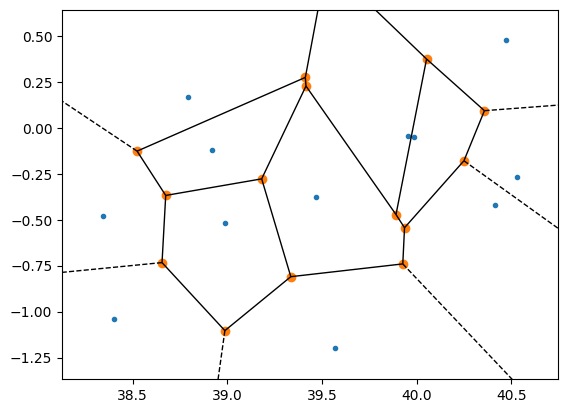

In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Coordenadas de tus localidades
points = [
    [38.3452, -0.4810],
     [38.7895, 0.1661],
     [38.4017, -1.0422],
     [39.9560, -0.0457],
     [40.4147, -0.4204],
     [39.9864, -0.0515],
     [40.5283, -0.2667],
     [40.4706, 0.4750],
     [39.4699, -0.3763],
     [38.9191, -0.1210],
     [39.5667, -1.2005],
     [38.9893, -0.5153]
]

# Calcular el diagrama de Voronoi
vor = Voronoi(points)

# Visualizar el diagrama de Voronoi (este es solo un ejemplo básico usando matplotlib)
fig = voronoi_plot_2d(vor)
plt.show()

In [29]:
vor.vertices

array([[39.92633065, -0.74047793],
       [39.52440907,  0.89547057],
       [39.33491661, -0.80993787],
       [38.98663564, -1.10342508],
       [38.65472863, -0.73328168],
       [40.35750702,  0.09310765],
       [40.05186467,  0.37419412],
       [40.24931516, -0.17933271],
       [39.93551753, -0.54365779],
       [39.8904281 , -0.47195616],
       [39.18100229, -0.27777079],
       [39.41500621,  0.22708372],
       [39.41159064,  0.27411693],
       [38.52300276, -0.12700111],
       [38.67418062, -0.36800382]])